In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print (torch.__version__)
print (torchvision.__version__)

2.1.0.dev20230707
0.16.0.dev20230707


#### Getting a dataset fashion mnist


In [2]:
train_data = datasets.FashionMNIST(root='data', train=True, download=True,
                                   transform=torchvision.transforms.ToTensor(), #how do we want to transform data
                                   target_transform=None #how do we want to transform labels/target
                                  )

test_data = datasets.FashionMNIST(root='data',
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None
                                 )

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
#making dict with labels
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
#check the shape of our image
image.shape #[colour, height, width]

torch.Size([1, 28, 28])

In [8]:
label

9

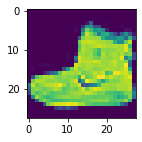

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(image[0,:,:])

Text(0.5, 1.0, 'Ankle boot')

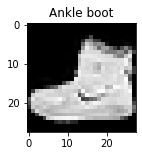

In [10]:
# WITH SQUEEZE
plt.figure(figsize=(2,2))
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[9])

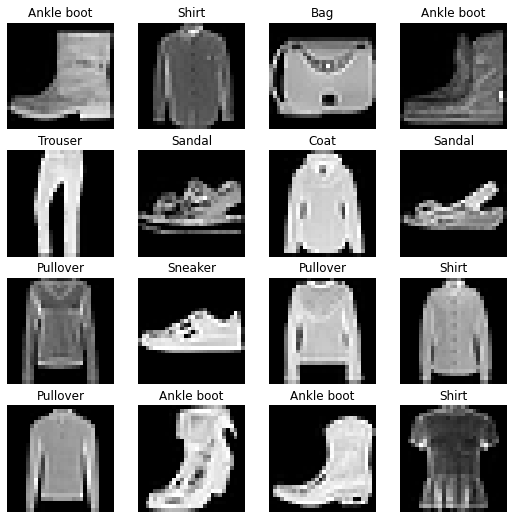

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range (1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)
    

## Maiking DataLoader

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())


DataLoader transforms our dataset into python data iterable


We want to transform our dataset into batches (or mini-batches)

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, shuffle=True,
                             batch_size = BATCH_SIZE)

test_dataloader = DataLoader(dataset=test_data,
                            shuffle=False,
                            batch_size = BATCH_SIZE)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x177ac7a60>,
 <torch.utils.data.dataloader.DataLoader at 0x177ac7b20>)

In [14]:
print (f'Number of butches in train: {len(train_dataloader)}')
print (f'Number of butches in test: {len(test_dataloader)}')

Number of butches in train: 1875
Number of butches in test: 313


In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Shirt')

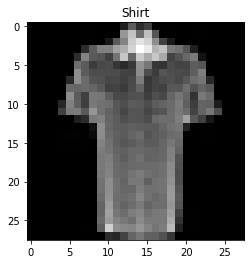

In [16]:
#Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])

## Makiing Baseline model

In [17]:
#Making Model with linear layers

flatten_model = nn.Flatten()

#Get a single sampple
x = train_features_batch[0]
# Flatten a sample

print (x.shape, flatten_model(x).shape)

torch.Size([1, 28, 28]) torch.Size([1, 784])


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, inpit_shape: int,
                hidden_untits: int,
                output_shape: list):
        super().__init__()
        
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=inpit_shape, out_features=hidden_untits),
                                        nn.Linear(in_features=hidden_untits, out_features=output_shape)
                                        )
        
        def forward(self, x):
            return self.layer_stack(x)
        

In [19]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(inpit_shape=784, #28*28
                             hidden_untits=10,
                             output_shape=len(class_names)
                             )

model_0.to('cpu')



FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Setup loss fucntion and optimizer

In [21]:
from helper_functions import accuracy_fn 

loss_fn = nn.CrossEntropyLoss()
optizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [28]:
# Making a function to time our experiments
from timeit import default_timer as timer

def print_train_time(start:float,
                    end:float,
                    device: torch.device = None):
    '''Print diif between start and finish'''
    
    total_time = end - start
    print (f'Train time on {device}: {total_time:.3f} second')
    return total_time

In [31]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 second


3.8416999984747235e-05

## Cratimg training loop and trainig on batches

1 Loop throught epochs

2 Loop throught batches

3 Calculate train loss per batch 

4 Loop throug testing loop and calculate test loss per batch

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print (f'Epoch: {epoch} ')
    #Training
    train_loss = 0
    #Add a loop to loop through the trainig batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        
        #Forward pass
        y_pred = model_0(X)
        
        #Calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss #Accumalatin while iterating through batches then averrage it
        
        #Optimitzer zero grad
        optizer.zero_grad()
        
        #Loss bacjward
        loss.backward()
        
        #Optimizer step
        optizer.step()
        
        if batch % 400 = 0:
            print (f'Batch: {batch} | epoch:  {epoch}' ')
                   
    #Divode total train loss  by length of train dataloader
    train_loss /= len(train_dataloader)
                   
    #Testing
    test_loss, test_acc = 0, 0
    
    model_0.eval()
    with torch.inference_modee():
        for X_test, y_test in test_dataloader:
              #
        
        
        

In [ ]:
16:07